In [19]:
import networkx as nx
import community
import numpy as np
import matplotlib.pyplot as plt
from random import randint,random
import networkx as nx
import matplotlib.pyplot as plt
import torch
import pickle
import scipy.sparse as sparse
from visualization import RANDOM_STATE
from spectral_cluster_model import clustering_experiment, weights_to_graph,cluster_net,delete_isolated_ccs,weights_array_to_cluster_quality
from visualization import run_spectral_cluster,build_cluster_graph

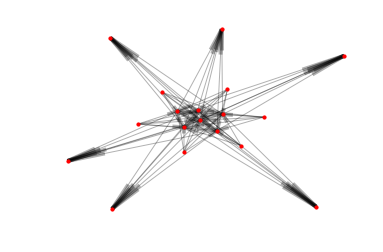

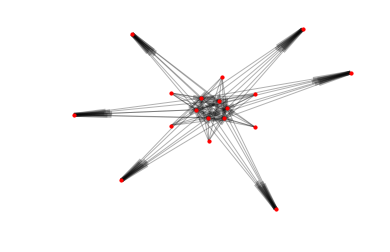

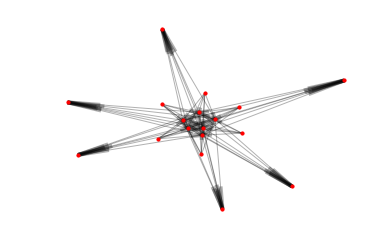

FileNotFoundError: [Errno 2] No such file or directory: 'CoraConvergence/WeightChanges-Cora-GCN-param_512_2_0.99_0.2-monte_0-120.pt'

In [5]:
dataset="Cora"
file_constraited=dataset+"Convergence"

for epoch in range(0,200,40):
    weights_path0=dataset+"Convergence/WeightChanges-Cora-GCN-param_512_2_0.99_0.2-monte_0-"+str(epoch)+".pt"
    weights_array0=torch.load(weights_path0)
    weights_array=[]
    for (i, weight) in enumerate(weights_array0):
        weight = weight[:100,:100].cpu().detach().numpy()
        weights_array.append(weight)
    weights_path=dataset+"Convergence/WeightChanges-Cora-GCN-param_512_2_0.99_0.2-monte_0-"+str(epoch)+".pckl"  
    pickle.dump(weights_array,open(weights_path,'wb'))
    
    
    adj_mat=weights_to_graph(weights_array)
    new_weight_array, new_adj_mat=delete_isolated_ccs(weights_array, adj_mat)
   
    num_clusters=6
    assign_labels = 'kmeans'
    eigen_solver = 'amg'
    epsilon=1e-8
    #[ncut_val, clustering_labels]=weights_array_to_cluster_quality(weights_array, adj_mat, num_clusters,eigen_solver, assign_labels, epsilon,is_testing=False)
    #    weights_array_to_cluster_quality() 
    #[labels, metrics]=run_spectral_cluster(weights_path)

    labels=cluster_net(num_clusters, adj_mat, eigen_solver, assign_labels)
    build_cluster_graph(weights_path,labels,normalize_in_out=True)


In [49]:
draw_cluster_by_layer(weights_path,
                          clustering_result,
                          n_clusters=4,
                          with_text=False,
                          size_factor=4,
                          width_factor=30,
                          ax=None)

<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 4000000 stored elements in Compressed Sparse Row format>

In [11]:
def ConvertToAdjaency(A):
    sp_mat = sparse.coo_matrix(np.abs(A.cpu().numpy()))
    N=A.shape
    
    partition=community.best_partition(G) 
    pos = nx.spring_layout(G)  # compute graph layout
    #plt.figure(figsize=(, 8))  # image is 8 x 8 inches
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=10, cmap=plt.cm.RdYlGn, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)

In [23]:
def plot_eigenvalues(weights, n_eigenvalues=None, ax=None, **kwargs):
    
    """weights = load_weights(weights_path)
    
    if 'cnn' in str(weights_path):
        weights, _ = extract_cnn_weights(weights, with_avg=True) #(max_weight_convention=='one_on_n'))
        print([w.shape for w in weights])"""
    
    
    # TODO: take simpler solution from delete_isolated_ccs_refactored
    adj_mat = weights_to_graph(weights)

    _, components = sparse.csgraph.connected_components(adj_mat)

    most_common_component_counts = Counter(components).most_common(2)
    main_component_id = most_common_component_counts[0][0]
    assert (len(most_common_component_counts) == 1
            or most_common_component_counts[1][1] == 1)
    
    main_component_mask = (components == main_component_id)

    selected_adj_mat = adj_mat[main_component_mask, :][:, main_component_mask]
    
    nrom_laplacian_matrix = sparse.csgraph.laplacian(selected_adj_mat, normed=True)
    
    
    if n_eigenvalues == None:
        start, end = 0, selected_adj_mat.shape[0] - 2
    elif isinstance(n_eigenvalues, int):
        start, end = 0, n_eigenvalues
    elif isinstance(n_eigenvalues, tuple):
        start, end = n_eigenvalues
    else:
        raise TypeError('n_eigenvalues should be either None or int or tuple or slice.')
    """
    eigen_values, _ = sparse.linalg.eigs(nrom_laplacian_matrix, k=end,
                                         which='SM')
    """

    sigma = 1

    OP = nrom_laplacian_matrix - sigma*sparse.eye(nrom_laplacian_matrix.shape[0])
    OPinv = sparse.linalg.LinearOperator(matvec=lambda v: sparse.linalg.minres(OP, v, tol=1e-5)[0],
                                         shape=nrom_laplacian_matrix.shape,
                                         dtype=nrom_laplacian_matrix.dtype)
    eigen_values, _ = sparse.linalg.eigsh(nrom_laplacian_matrix, sigma=sigma,
                                          k=end, which='LM', tol=1e-5, OPinv=OPinv)
    
    eigen_values = np.sort(eigen_values)
    
    eigen_values = eigen_values[start:end]
    
    if ax is None:
        _, ax = plt.subplots(1)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    if 'linestyle' not in kwargs:
        kwargs['linestyle'] = 'none'
        kwargs['marker'] = '*'
        kwargs['markersize'] = 5
    
    return ax.plot(range(start + 1, end + 1),
                   eigen_values,
                   **kwargs)

In [21]:
def GrowConnectivity(G):
    algebraic_connectivity=[]
    for k in range(2):
        algebraic_connectivity.append([])
        for i in range(N):
            G.add_edge(randint(0,N-1),randint(0,N-1))
            algebraic_connectivity[k].append(nx.linalg.algebraic_connectivity(G))

In [6]:
import sparse

ModuleNotFoundError: No module named 'sparse'

In [34]:

    
    """
    G = nx.from_scipy_sparse_matrix(adj_mat)
    partition=community.best_partition(G)
    pos = nx.spring_layout(G)  # compute graph layout
    #plt.figure(figsize=(, 8))  # image is 8 x 8 inches
    plt.axis('off')
    nx.draw_networkx_nodes(G, pos, node_size=10, cmap=plt.cm.RdYlGn, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)"""

TypeError: 'int' object is not iterable

In [26]:
import spectral_cluster_model.cl


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [35]:
spectral_cluster_model.clustering_experiment?

In [36]:
 experiment_run = clustering_experiment.run(config_updates=config_updates,
                                                   named_configs=named_configs)
    

NameError: name 'clustering_experiment' is not defined

In [11]:
import scipy.sparse as sparse


In [14]:
sparse.csgraph.connected_components?

In [15]:
shapes=(100,100)

In [18]:
for i in shapes:
    print (i)

100
100


In [20]:
import itertools as it

In [25]:
np.unique?

In [26]:
layer_labels

NameError: name 'layer_labels' is not defined